In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
path = 'dns_oct-jan.csv'
data = pd.read_csv(path)
data['day'] = pd.to_datetime(data.day)
data = data[['shieldid', 'day', 'dns_qname', 'dns_qdomainname', 'num_clients', 'num_responses']]
data

,shieldid,day,dns_qname,dns_qdomainname,num_clients,num_responses
0,ajkerabo,2022-11-01,104422-22.chat.api.drift.com,drift.com,1,8
1,ajkerabo,2022-12-31,11.au.download.windowsupdate.com,windowsupdate.com,1,2
2,ajkerabo,2022-10-07,569c0a1f72747e0eb7ce1c550cb03bbc.fp.measure.of...,office.com,1,12
3,ajkerabo,2022-11-02,aadcdn.msftauth.net,msftauth.net,2,3
4,ajkerabo,2022-10-31,accounts.platform.intuit.com,intuit.com,1,16
...,...,...,...,...,...,...
47100086,zicudiva,2022-10-06,x2.c.lencr.org.x.892f20f60429504bf60b994054573...,opendns.com,1,2
47100087,zicudiva,2022-10-06,x2.c.lencr.org.x.a8be30e5069f404f17098f3061fc3...,opendns.com,1,2
47100088,zicudiva,2022-10-11,x2.c.lencr.org.x.aabfe1ae0093804cec0899d097ed8...,opendns.com,1,2
47100089,zicudiva,2022-10-04,x2.c.lencr.org.x.eac44390075f1048640bfba05443d...,opendns.com,1,2


In [3]:
df1 = data.groupby(by=['dns_qdomainname','day']).sum()
df2 = data.groupby(by=['dns_qdomainname','day'])['dns_qname'].nunique()
df2 = pd.DataFrame(df2)
df2.rename(columns={'dns_qname': 'num_dns_qname'}, inplace=True)

In [4]:
df = pd.concat([df1, df2], axis=1)
df.reset_index(level=1, inplace=True)
df

,day,num_clients,num_responses,num_dns_qname
dns_qdomainname,,,,
*google.com,2022-10-02,1,2,1
*google.com,2022-10-03,1,2,1
*google.com,2022-10-04,1,2,1
*google.com,2022-10-10,1,1,1
*google.com,2022-10-11,3,115,1
...,...,...,...,...
zzzzzzz1000.ph,2022-12-15,1,1,1
zzzzzzzzz.com,2022-12-29,1,2,1
zzzzzzzzzzzzzzzzzz.com,2022-12-28,1,2,1


In [5]:
df1 = data.groupby(by=['dns_qdomainname','day','shieldid']).sum()
df2 = data.groupby(by=['dns_qdomainname','day','shieldid'])['dns_qname'].nunique()
df2 = pd.DataFrame(df2)
df2.rename(columns={'dns_qname': 'num_dns_qname'}, inplace=True)
newdf = pd.concat([df1, df2], axis=1)
newdf.reset_index(level=1, inplace=True)

In [6]:
newdf.reset_index(level=1, inplace=True)

In [13]:
newdf

,shieldid,day,num_clients,num_responses,num_dns_qname
dns_qdomainname,,,,,
*google.com,myakitjit,2022-10-02,1,2,1
*google.com,myakitjit,2022-10-03,1,2,1
*google.com,nimchulha,2022-10-04,1,2,1
*google.com,thewseanwi,2022-10-10,1,1,1
*google.com,nimchulha,2022-10-11,1,110,1
...,...,...,...,...,...
zzzzzzz1000.ph,haddomyev,2022-12-15,1,1,1
zzzzzzzzz.com,haddomyev,2022-12-29,1,2,1
zzzzzzzzzzzzzzzzzz.com,haddomyev,2022-12-28,1,2,1


In [41]:
domain = 'yourownbackyardpodcast.com' #change this domain name to test if it is an anomaly. 
dfdomain = newdf.loc[(newdf.index==domain)]
dfdomain['ratio'] = dfdomain.num_responses/dfdomain.num_clients

C:\Users\jack.schwaiger\AppData\Local\Temp\ipykernel_7200\3272866425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdomain['ratio'] = dfdomain.num_responses/dfdomain.num_clients


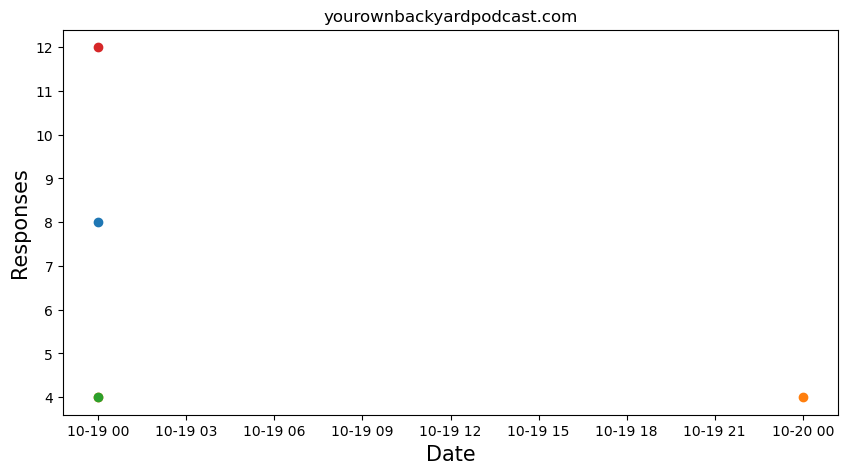

In [42]:
plt.figure(figsize=(10,5))
plt.xlabel('Date', fontsize=15)
plt.ylabel('Responses', fontsize=15)
plt.title(domain)
for i in range(dfdomain.shieldid.nunique()):
    # data points
    shield = list(dfdomain.shieldid.unique())[i]
    plt.scatter(dfdomain.loc[dfdomain.shieldid==shield].day,dfdomain.loc[dfdomain.shieldid==shield].num_responses)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


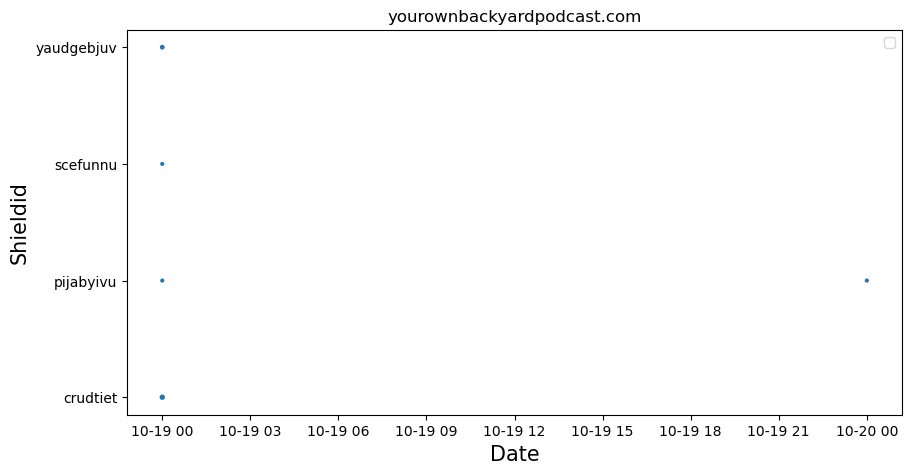

In [43]:
plt.figure(figsize=(10,5))
plt.xlabel('Date', fontsize=15)
plt.ylabel('Shieldid', fontsize=15)
plt.title(domain)
plt.scatter(dfdomain.day, dfdomain.shieldid, s=dfdomain.ratio)
plt.legend()